<a href="https://colab.research.google.com/github/Mohamm76/Arabic-Handwritten-Digits-Recognition-KSA/blob/main/notebook/Arabic_MNIST_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ربط الملف بجوجل درايف

In [1]:
# 1. ربط Google Drive للوصول إلى المجلدات التي أنشأتها
from google.colab import drive
drive.mount('/content/drive')

# 2. تحديد المسار الرئيسي للمشروع (تأكد من مطابقة الاسم لما أنشأته في درايف)
import os
os.chdir('/content/drive/MyDrive/AI_Portfolio/Arabic_MNIST')
print("المسار الحالي هو:", os.getcwd())

Mounted at /content/drive
المسار الحالي هو: /content/drive/MyDrive/AI_Portfolio/Arabic_MNIST


# جلب البيانات وتخزينها
سنقوم الآن بتحميل مجموعة بيانات MADBase (الأرقام العربية) مباشرة إلى مجلد data في الدرايف الخاص بي لتجنب تكرار التحميل لاحقاً.

In [2]:
# تحميل البيانات بصيغة CSV (الأسهل للمبتدئين) مباشرة إلى مجلد data
# سنستخدم نسخة GitHub الموثقة للبيانات لضمان سرعة التحميل
!wget -P data/ https://raw.githubusercontent.com/mloey/Arabic-Handwritten-Digits-Dataset/master/Arabic%20Handwritten%20Digits%20Dataset%20CSV.zip

# فك الضغط داخل مجلد data
import zipfile
with zipfile.ZipFile('data/Arabic Handwritten Digits Dataset CSV.zip', 'r') as zip_ref:
    zip_ref.extractall('data/')

print("تم تحميل البيانات وفك الضغط بنجاح في مجلد data")

--2026-01-29 06:49:20--  https://raw.githubusercontent.com/mloey/Arabic-Handwritten-Digits-Dataset/master/Arabic%20Handwritten%20Digits%20Dataset%20CSV.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13911478 (13M) [application/zip]
Saving to: ‘data/Arabic Handwritten Digits Dataset CSV.zip.1’

Arabic Handwritten  100%[===================>]  13.27M  52.9MB/s    in 0.3s    

2026-01-29 06:49:20 (52.9 MB/s) - ‘data/Arabic Handwritten Digits Dataset CSV.zip.1’ saved [13911478/13911478]

تم تحميل البيانات وفك الضغط بنجاح في مجلد data


# تحميل البيانات ومعاينتها

شكل مصفوفة التدريب: (60000, 784)
شكل مصفوفة التسميات: (60000, 1)


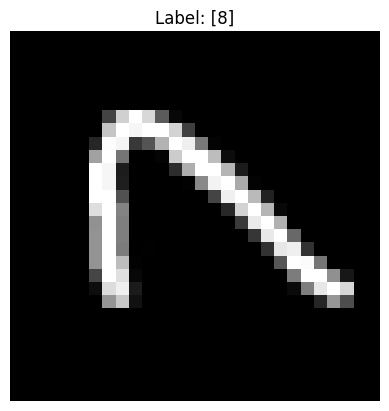

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. تحميل ملفات الـ CSV (الصور والتسميات)
# نستخدم pandas لقراءة البيانات؛ الصور هي عبارة عن صفوف من 784 بكسل (28x28)
X_train = pd.read_csv('data/csvTrainImages 60k x 784.csv', header=None)
y_train = pd.read_csv('data/csvTrainLabel 60k x 1.csv', header=None)

# 2. معاينة شكل البيانات
print(f"شكل مصفوفة التدريب: {X_train.shape}") # المتوقع (60000, 784)
print(f"شكل مصفوفة التسميات: {y_train.shape}") # المتوقع (60000, 1)

# 3. عرض عينة من الصور للتأكد من جودتها
# سنقوم بتحويل الصف الأول إلى مصفوفة 28x28 لعرضها
sample_image = X_train.iloc[8].values.reshape(28, 28)
plt.imshow(sample_image.T, cmap='gray') # نستخدم.T لأن الصور في MADBase قد تحتاج لتدوير
plt.title(f"Label: {y_train.iloc[8].values}")
plt.axis('off')
plt.show()

# هندسة البيانات وتجهيزها للتدريب

### التحجيم (Normalization) وتجهيز التسميات